## Занятие 5. Проверка статистических гипотез.

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


Большинство из этих функций вовзращает два значения (бывает и больше). Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

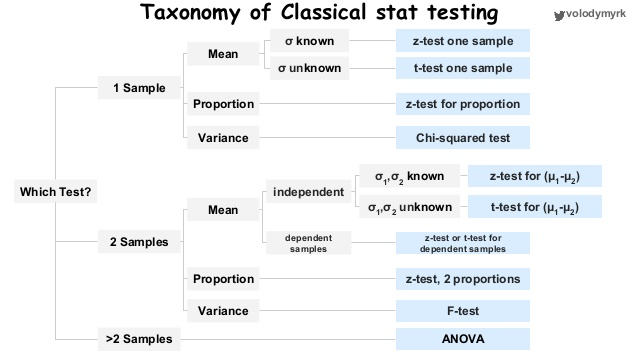

In [18]:
from IPython.display import Image
# https://www.slideshare.net/vladimirkazantsev/how-to-concludeonlineexperimentsinpython
Image("stat_tests.jpg")

### Пример 1. Проверка нормальности распределения


In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/Полина/notebooks/Shad_Python_06_2/")

In [3]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251')
df = df.set_index(u'номер')

(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <BarContainer object of 10 artists>)

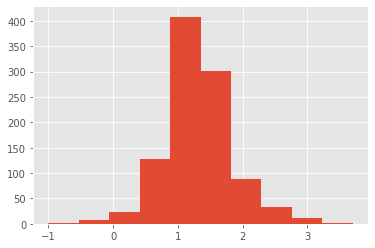

In [4]:
# https://stackoverflow.com/questions/2464959/whats-the-u-prefix-in-a-python-string
plt.hist(np.log10(df[u'население']))

In [5]:
res = stats.shapiro(np.log(df[u'население']))
print('p-value: ', res[1])

p-value:  3.148387583626344e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов.

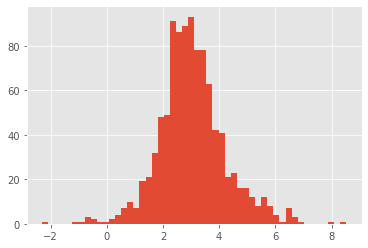

In [6]:
plt.hist(np.log(df[u'население']), bins=50);

### Пример 2. Критерий Манна-Уитни. Дома в Альбукерке (на углу VS не на углу)


In [7]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')

In [8]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но предварительно нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [9]:
df = df.replace(-9999, np.nan)

In [10]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [11]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

Проверяем нормальность распределений. 

In [12]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

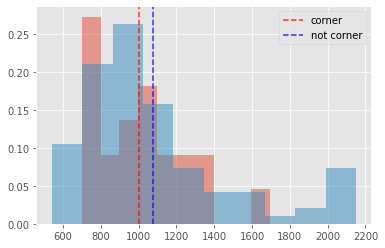

In [13]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

In [14]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.8044081572425339


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: цены домов различаются незначимо -- разница медиан в выборках случайна.

### Пример 3. Дома в Альбукерке (северо-восток VS остальные)
Добавлен механизм удаления выбросов через Z score

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [222]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df['z_x'] = np.abs(stats.zscore(df[df['NE'] == 1]['PRICE']))
df['z_y'] = np.abs(stats.zscore(df[df['NE'] == 0]['PRICE']))

In [163]:
# df загружен в предыдущем примере
x = df[(df['NE'] == 1)&(df['z_x'] <= 2)]['PRICE']
y = df[(df['NE'] == 0)&(df['z_y'] <= 2)]['PRICE']
x.name, y.name = 'NE', 'not NE'

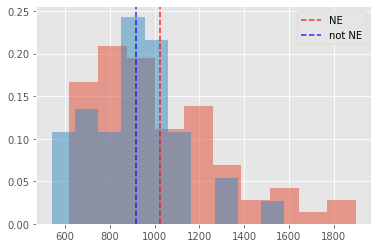

In [164]:
two_histograms(x, y)

#### Смотрим нормальность

In [165]:
stats.shapiro(np.log(x))

ShapiroResult(statistic=0.9658826589584351, pvalue=0.04786922037601471)

In [166]:
stats.shapiro(np.log(y))

ShapiroResult(statistic=0.9843676686286926, pvalue=0.8715007305145264)

In [169]:
res = stats.median_test(x, y)
print('p-value:', res[1])

p-value: 0.7369424919816009


In [170]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.1293380250826351


In [171]:
res = stats.ttest_ind(x, y)
print('p-value:', res[1])

p-value: 0.053868929095560326


In [173]:
cuped(df, df[(df['NE'] == 1)]['PRICE'], df[(df['NE'] == 0)]['PRICE'])

KeyError: "None of [Int64Index([2050, 2080, 2150, 2150, 1999, 1900, 1800, 1560, 1450, 1449, 1375,\n            1270, 1250, 1235, 1170, 1180, 1155, 1110, 1139,  995,  995,  975,\n             975,  900,  960,  860, 1695, 1553, 1250, 1300, 1020, 1020,  922,\n             925,  899,  850,  876,  890,  870,  700,  720,  720,  749,  731,\n             725,  670, 2150, 1599, 1350, 1299, 1250, 1239, 1200, 1125, 1100,\n            1080, 1050, 1049,  955,  934,  875,  889,  855,  835,  810,  805,\n             799,  750,  759,  755,  750,  730,  729,  710,  773,  690,  670,\n             619],\n           dtype='int64')] are in the [index]"

In [ ]:
res = stats.ttest_ind(x, cuped(x, y))
print('p-value:', res[1])

### Пример 4. Критерий Стьюдента для независимых выборок. 

Возраст, в котором умирают европейские аристократы.


Данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty, aristocracy, and gentry).

In [26]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])

In [27]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [28]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

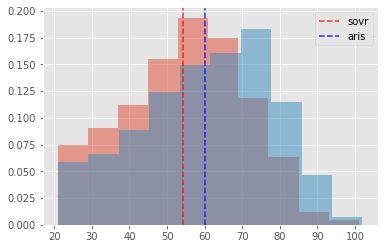

In [29]:
two_histograms(x, y)

Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

In [30]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.00010116077103844913


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [31]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  1.5181184197728794e-26


### Пример 5. Критерий Стьюдента для парных выборок. Чтение названий цветов


Исследование 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался.

In [32]:
df = pd.read_csv('interference.csv')
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

In [33]:
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


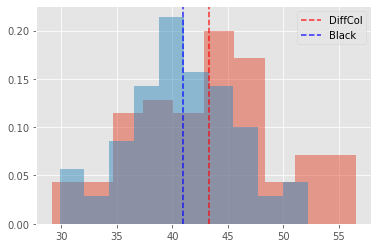

In [35]:
two_histograms(x, y)

Распределения условно нормальны.  Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выбоки у нас связные, а значит используем ```ttest_rel```.

In [36]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value:  0.0162416779538072


p-value получился довольно низким, но возможно не таким низким, как хотелось бы. На уровне значимости 0.05 гипотеза будет отвергнута, но на уровне 0.01 уже нет. Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

### Пример 6. Популярность кандидата.

В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе.

Проверять будем критерием хи-квадрат. Сначала построим таблицу сопряжённости.

In [37]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


In [40]:
res = stats.chi2_contingency(contingency_table)
print('p-value: {0}'.format(res[1]))

p-value: 0.2464701206916715


p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет.

### Пример 7. Корреляция цены и площади домов в Альбукерке.


In [41]:
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [42]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

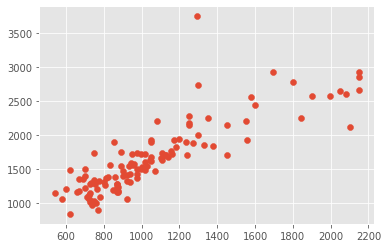

In [43]:
plt.scatter(df['PRICE'], df['SQFT'])

In [44]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8447950985552124
p-value:  5.146345707629025e-33


In [45]:
df = df.replace(-9999, np.nan)

res = stats.pearsonr(df['TAX'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

ValueError: array must not contain infs or NaNs

In [49]:
df = df.replace(-9999, np.nan)

res = stats.pearsonr(df.dropna(subset=['TAX', 'SQFT'])['TAX'], df.dropna(subset=['TAX', 'SQFT'])['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8585827999905363
p-value:  3.0797212455932033e-32


### Bootstrap

#### Разница средних

In [105]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats
import bootstrapped.power as power
df = pd.read_csv('Albuquerque/Albuquerque Home Prices_data.txt', sep='\t')
x = df[(df['NE'] == 1)]['PRICE']
y = df[(df['NE'] == 0)]['PRICE']
x.name, y.name = 'NE', 'not NE'

res = bs.bootstrap_ab(test=np.array(x), ctrl=np.array(y),
                                  stat_func=bs_stats.mean, 
                                  compare_func=bs_compare.difference,
                                  alpha=0.05, 
                                  num_iterations=100000)
print(res)

134.8717948717948    (3.281730769230819, 269.9230769230769)


#### Сами средние

In [106]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

print(bs.bootstrap(np.array(x), stat_func=bs_stats.mean, num_iterations=10000))

print(bs.bootstrap(np.array(x), stat_func=bs_stats.std,num_iterations=10000))


1107.6923076923076    (1016.1490384615383, 1191.5897435897434)
398.9598433520535    (333.76560026641613, 481.29966979602364)


In [107]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

print(bs.bootstrap(np.array(y), stat_func=bs_stats.mean, num_iterations=10000))

print(bs.bootstrap(np.array(y), stat_func=bs_stats.std,num_iterations=10000))


972.8205128205128    (869.2564102564102, 1065.9)
316.2609172571793    (213.53014813687264, 443.67983108050026)


### CUPED
https://medium.com/bbc-data-science/increasing-experiment-sensitivity-through-pre-experiment-variance-reduction-166d7d00d8fd

https://github.com/dangdang001/CUPED/blob/d728f2b2cb7b16fb0d94dad69d73aa24579033d2/CUPED.ipynb

https://towardsdatascience.com/how-to-double-a-b-testing-speed-with-cuped-f80460825a90

https://habr.com/ru/company/yandex/blog/497804/

In [ ]:
# theta = covariance(metric, covariate) / variance(covariate)

In [229]:
df = pd.read_csv('interference.csv')
x = df['DiffCol']
y = df['Black']
#x.name, y.name = 'DiffCol', 'Black'

In [236]:
def cuped(df, x, y):
    theta = df.cov().loc[x, y] / df.cov().loc[x, x]
    
    df['cuped'] = df[y] - theta * df[x]
    
    return df['cuped']
cuped(df, 'DiffCol', 'Black')

0     37.400221
1     41.875095
2     31.879209
3     39.303599
4     42.962512
        ...    
65    41.530577
66    39.642541
67    39.844858
68    45.342036
69    46.863163
Name: cuped, Length: 70, dtype: float64

In [239]:
res = stats.ttest_rel(df.Black, df.DiffCol)
print('p-value: ', res[1])

p-value:  0.0162416779538072


In [240]:
res = stats.ttest_rel(df.cuped, df.DiffCol)
print('p-value: ', res[1])

p-value:  0.011083092464444892


In [241]:
df.describe()

,Subj,DiffCol,Black,cuped
count,70.000000,70.000000,70.000000,70.000000
mean,35.500000,43.300143,41.000143,40.858380
std,20.351085,6.149710,4.840233,4.840191
min,1.000000,29.130000,29.850000,29.704637
25%,18.250000,38.760000,38.195000,38.024714
50%,35.500000,44.330000,40.965000,40.837169
75%,52.750000,46.962500,44.447500,44.291106
max,70.000000,56.550000,52.210000,52.057532


In [237]:
def cuped(x, y):
    covariance = np.cov(x, y)
    variance = np.cov(x)
    theta = covariance / variance
    return y - theta[0][1] * x
cuped(x, y)

0     37.400221
1     41.875095
2     31.879209
3     39.303599
4     42.962512
        ...    
65    41.530577
66    39.642541
67    39.844858
68    45.342036
69    46.863163
Length: 70, dtype: float64

In [231]:
cuped(x, y).describe()

count    70.000000
mean     40.858380
std       4.840191
min      29.704637
25%      38.024714
50%      40.837169
75%      44.291106
max      52.057532
dtype: float64

In [234]:
y.describe()

count    70.000000
mean     41.000143
std       4.840233
min      29.850000
25%      38.195000
50%      40.965000
75%      44.447500
max      52.210000
Name: Black, dtype: float64

#### Boston
CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

In [27]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['TARGET'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [64]:
control = df[df.CHAS == 0][['RM', 'TARGET']]
print(control.shape)
test = df[df.CHAS == 1][['RM', 'TARGET']]
print(test.shape)

(471, 2)

(35, 2)

In [47]:
stats.fligner(test.TARGET, control.TARGET)[1]

0.19570789411432388

In [48]:
stats.fligner(np.log(test.TARGET), np.log(control.TARGET))[1]

0.9824671239445418

In [49]:
stats.mannwhitneyu(test.TARGET, control.TARGET)

MannwhitneyuResult(statistic=10879.5, pvalue=0.0015816705011294974)

In [53]:
stats.ttest_ind(test.TARGET, control.TARGET)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### Boston cuped

In [70]:
covariance = np.cov(df.TARGET, df.RM)
variance = np.cov(df.RM)
theta_calc = covariance / variance
theta = theta_calc[0][1]

In [71]:
df['cuped'] = df.TARGET - (df.RM - df.RM.mean()) * theta
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET,cuped
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,21.357061
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,20.358785
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,26.504774
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,26.906868
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,28.350654


<AxesSubplot:>

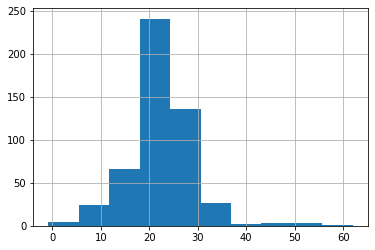

In [72]:
df.cuped.hist()

<AxesSubplot:>

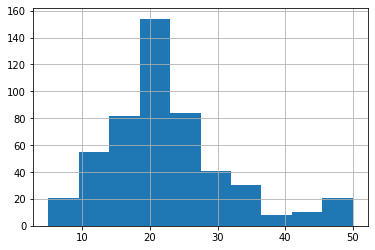

In [73]:
df.TARGET.hist()

In [76]:
control = df[df.CHAS == 0][['cuped']]
print(control.shape)
test = df[df.CHAS == 1][['cuped']]
print(test.shape)

(471, 1)
(35, 1)


In [77]:
stats.mannwhitneyu(test.cuped, control.cuped)

MannwhitneyuResult(statistic=10837.0, pvalue=0.0018821612930453038)

In [78]:
stats.ttest_ind(test.cuped, control.cuped)

Ttest_indResult(statistic=3.535763564177653, pvalue=0.0004440987696123606)

In [79]:
stats.fligner(test.cuped, control.cuped)[1]

0.1753595182376662

In [83]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

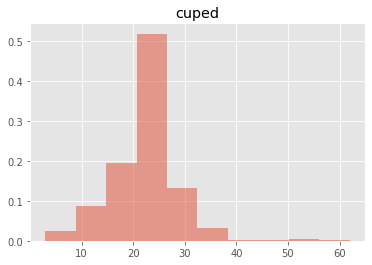

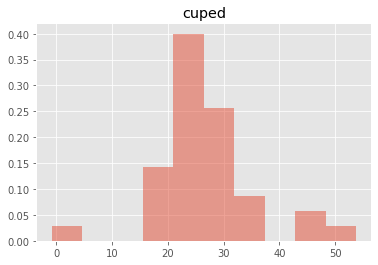

In [87]:
test.name, control.name = 'corner', 'not corner'
two_histograms(control, test)
